In [2]:
import os
data_dirs = [d for d in os.listdir('train/train')]
print(data_dirs)

['1', '100', '101', '102', '103', '104', '105', '106', '107', '109', '11', '111', '112', '113', '114', '116', '117', '118', '119', '120', '121', '122', '123', '124', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '20', '201', '202', '203', '204', '205', '206', '207', '208', '209', '211', '212', '213', '214', '215', '216', '217', '4', '7', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '93', '94', '95', '96', '97', '98', '99', 'Acura', 'Amkette', 'Apple', 'b', 'BACCARAT', 'BaiDu', 'Batman', 'd', 'Dell

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    # horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

Data_training_generator = train_datagen.flow_from_directory(
    'train/train',
    classes=data_dirs,
    subset='training',
    target_size=(256, 256),
    batch_size=16,
    shuffle=False,
    class_mode='sparse'
)

Data_vali_generator = test_datagen.flow_from_directory(
    'train/train',
    classes=data_dirs,
    subset='validation',
    target_size=(256, 256),
    batch_size=16,
    shuffle=False,
    class_mode='sparse'
)



Found 1946 images belonging to 173 classes.
Found 432 images belonging to 173 classes.


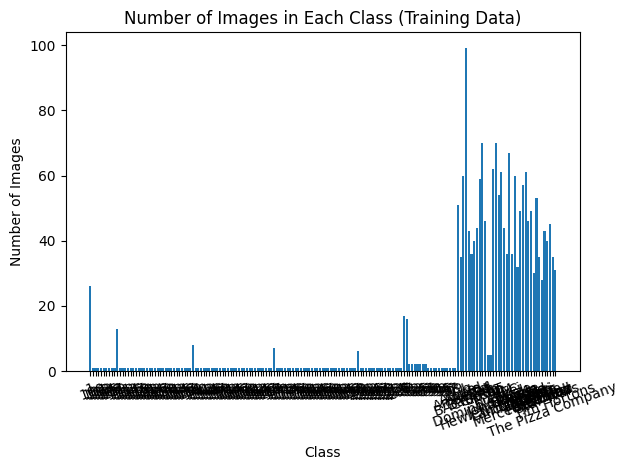

In [28]:
# prompt: plot the number of images in each class on train_data
import numpy as np
import matplotlib.pyplot as plt

class_counts = Data_training_generator.classes
unique_classes, counts = np.unique(class_counts, return_counts=True)

plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Training Data)')
plt.xticks(unique_classes, Data_training_generator.class_indices.keys(), rotation=20)
plt.tight_layout()
plt.show()


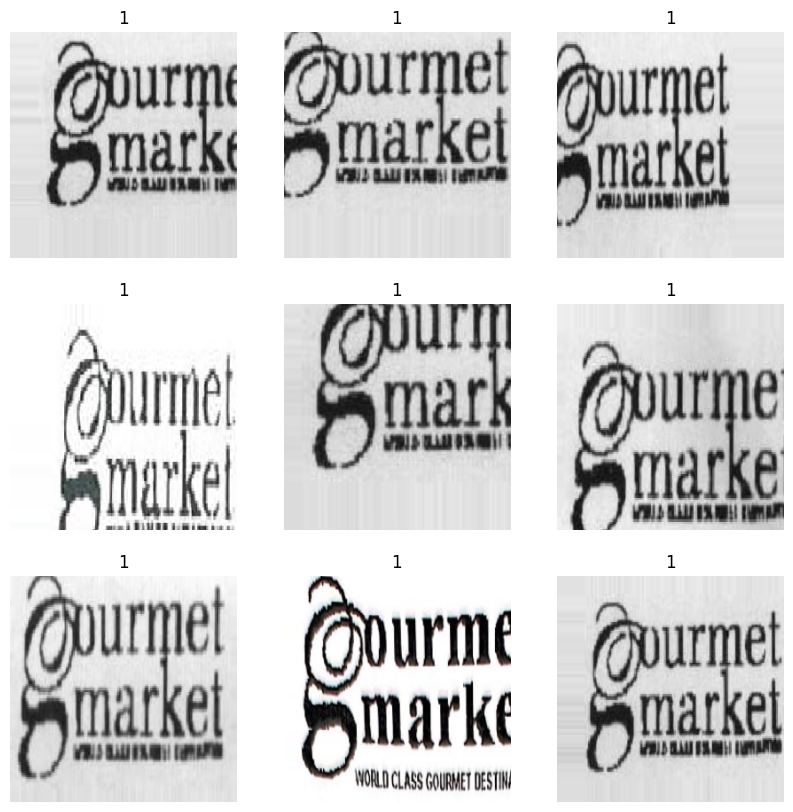

In [29]:
# Display some images from the training data
x, y = next(Data_training_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(data_dirs[int(y[i])])
  plt.axis('off')
plt.show()

In [30]:
# prompt: get the base inception model without top layers

from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

base_model.trainable = False

In [31]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 127, 127,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [32]:
import tensorflow as tf
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(len(data_dirs), activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

In [33]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 127, 127,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 24,078,285 (91.85 MB)

 Trainable params: 2,275,501 (8.68 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [34]:
# prompt: compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:

from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

checkpoint_filepath = 'best_model.keras'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

earlystopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=15,
    verbose=1,
    restore_best_weights=True,
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_loss",
    patience=7, 
    verbose=1, 
    factor=0.2, 
    min_lr=0.00000001
)

In [36]:
history = model.fit(
    Data_training_generator,
    epochs=13,
    validation_data=Data_vali_generator,
    callbacks=[model_checkpoint_callback,earlystopping,learning_rate_reduction]
    )

d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 83s 640ms/step - accuracy: 0.0497 - loss: 5.8594 - val_accuracy: 0.2523 - val_loss: 3.5196
Epoch 2/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 77s 631ms/step - accuracy: 0.1261 - loss: 3.9919 - val_accuracy: 0.3750 - val_loss: 2.6491
Epoch 3/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 610ms/step - accuracy: 0.2766 - loss: 2.9554 - val_accuracy: 0.4838 - val_loss: 2.2785
Epoch 4/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 76s 620ms/step - accuracy: 0.3480 - loss: 2.6987 - val_accuracy: 0.5370 - val_loss: 1.8614
Epoch 5/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 76s 626ms/step - accuracy: 0.4220 - loss: 2.3713 - val_accuracy: 0.6088 - val_loss: 1.6786
Epoch 6/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 75s 619ms/step - accuracy: 0.5019 - loss: 2.0865 - val_accuracy: 0.6134 - val_loss: 1.4554
Epoch 7/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 77s 632ms/step - accuracy: 0.4667 - loss: 2.2265 - val_accuracy: 0.7407 - val_loss: 1.3041
Epoch 8/13
122/122 ━━━━━━━━━━━━━━━━━━━━ 72s 594ms/step - accuracy: 0.5332 - loss: 1

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

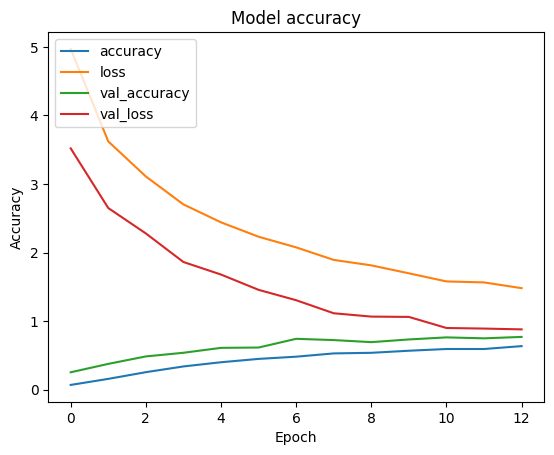

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss','val_accuracy','val_loss'], loc='upper left')
plt.show()

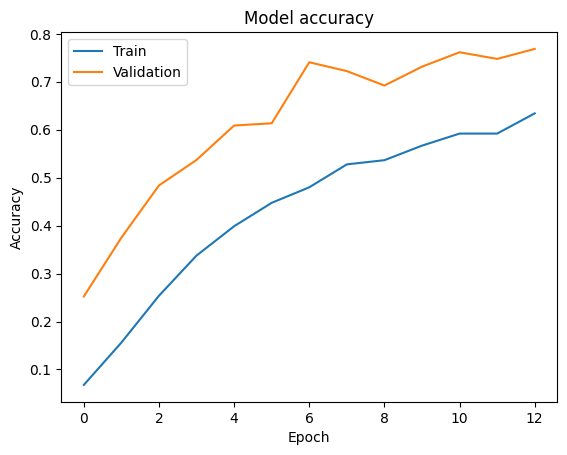

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
model.load_weights(checkpoint_filepath)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 418ms/step
Macro F1-score: 0.80023613531286


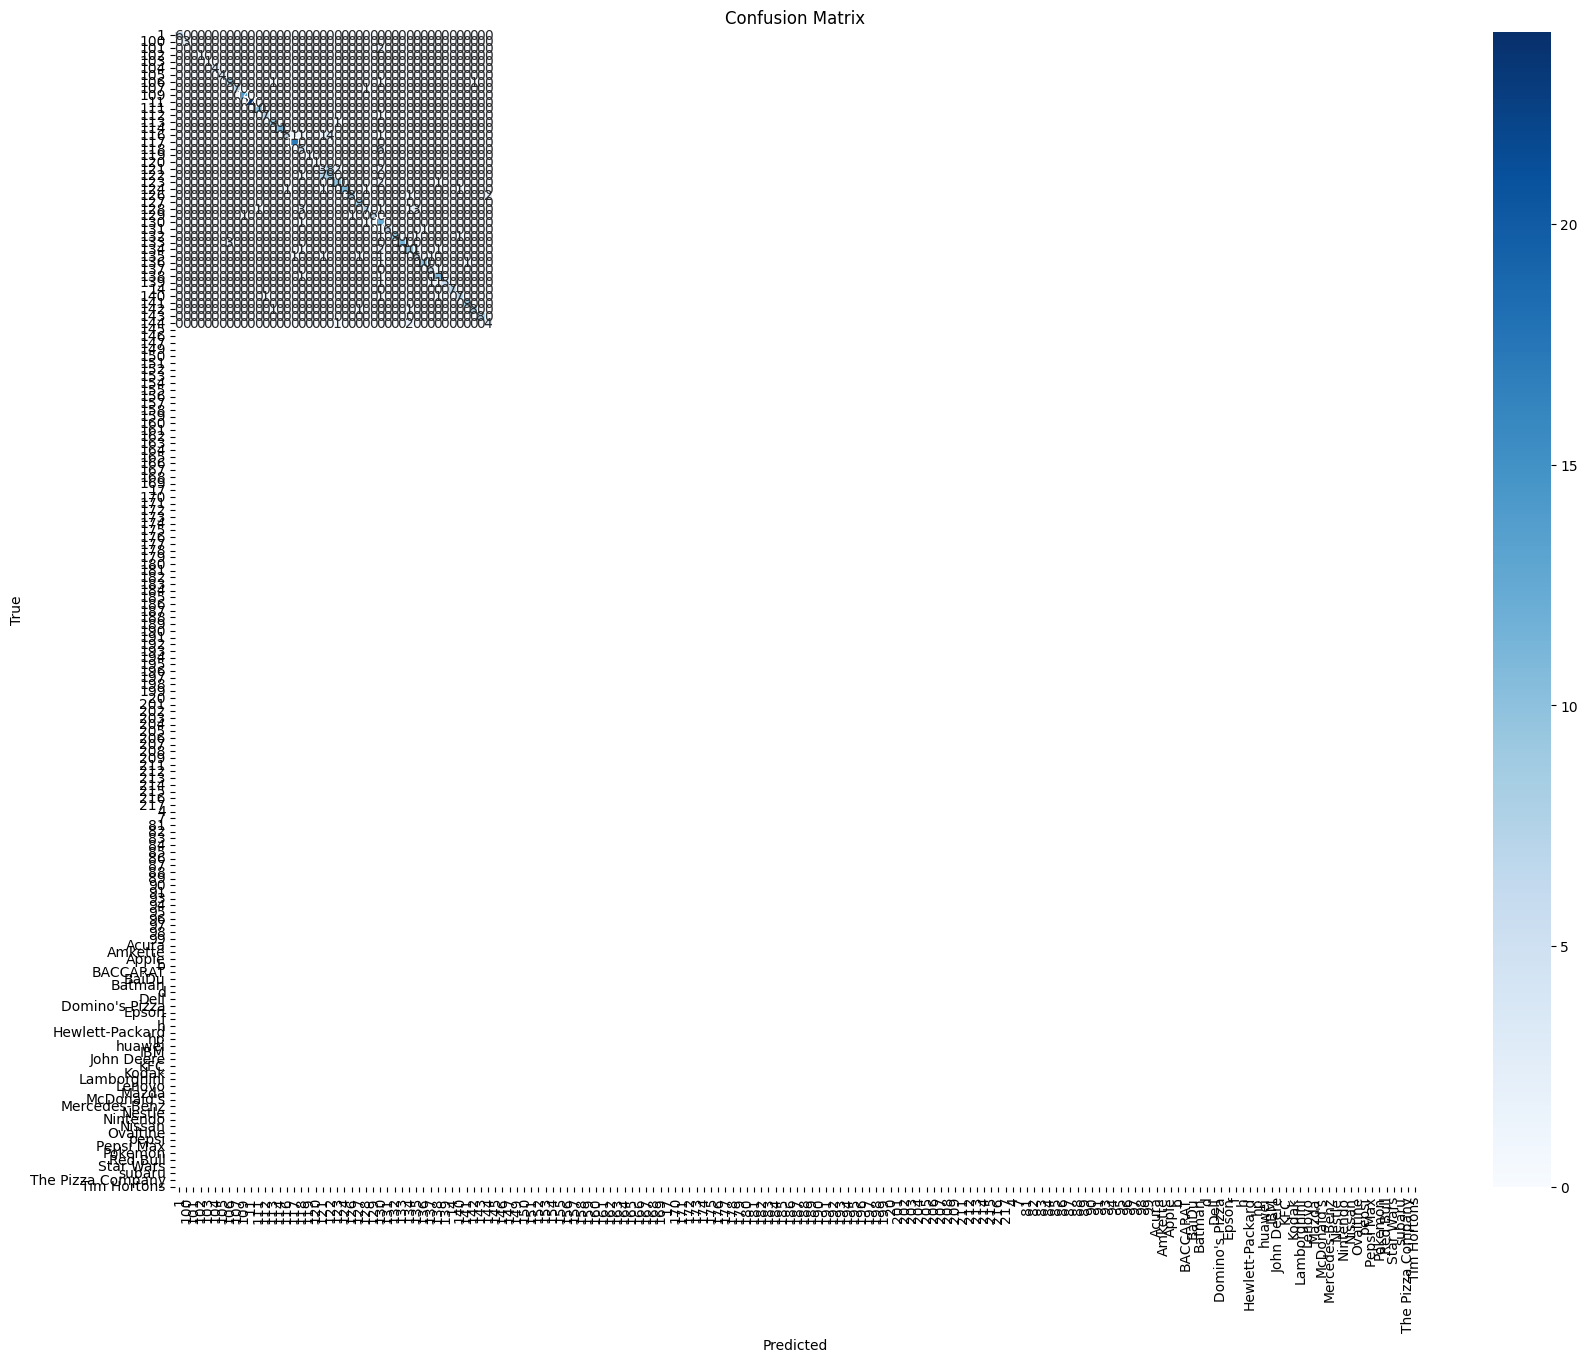

In [42]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Predict classes for test data
y_pred_prob = model.predict(Data_vali_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = Data_vali_generator.classes

# Calculate macro F1-score
macro_f1 = f1_score(y_true, y_pred, average='macro')
print("Macro F1-score:", macro_f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_dirs, yticklabels=data_dirs)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
